# Data Manipulations in PySpark

In [2]:
from pathlib import Path
home = "dbfs:/mnt/data"

path_LMS = f"{home}/data/Predict-Forclosure/Foreclosure-Prediction-Dataset/LMS_31JAN2019.csv"
path_RMS_Final = f"{home}/data/Predict-Forclosure/Foreclosure-Prediction-Dataset/RF_Final_Data.csv"
path_Customer = f"{home}/data/Predict-Forclosure/Foreclosure-Prediction-Dataset/Customers_31JAN2019.csv"

In [4]:
df_lms = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv(path_LMS)
df_lms

DataFrame[AGREEMENTID: int, CUSTOMERID: string, LOAN_AMT: string, NET_DISBURSED_AMT: string, INTEREST_START_DATE: string, CURRENT_ROI: double, ORIGNAL_ROI: double, CURRENT_TENOR: int, ORIGNAL_TENOR: int, DUEDAY: int, AUTHORIZATIONDATE: string, CITY: string, PRE_EMI_DUEAMT: double, PRE_EMI_RECEIVED_AMT: double, PRE_EMI_OS_AMOUNT: double, EMI_DUEAMT: double, EMI_RECEIVED_AMT: double, EMI_OS_AMOUNT: double, EXCESS_AVAILABLE: double, EXCESS_ADJUSTED_AMT: double, BALANCE_EXCESS: double, NET_RECEIVABLE: double, OUTSTANDING_PRINCIPAL: double, PAID_PRINCIPAL: double, PAID_INTEREST: double, MONTHOPENING: double, LAST_RECEIPT_DATE: string, LAST_RECEIPT_AMOUNT: double, NET_LTV: double, COMPLETED_TENURE: int, BALANCE_TENURE: int, DPD: int, FOIR: double, PRODUCT: string, SCHEMEID: string, NPA_IN_LAST_MONTH: string, NPA_IN_CURRENT_MONTH: string, MOB: int]

In [7]:
df_Customer = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv(path_Customer)
df_Customer.toPandas()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,None,33.0,M,M,POSTGRAD,0.0,None,None,198375.22180,8.0,198375.22180,400070
1,12001001,1,5,None,44.0,M,M,POSTGRAD,0.0,None,None,242703.98290,10.0,242703.98290,400070
2,12001002,1,7,None,50.0,M,M,GRAD,0.0,None,None,0.00000,NaN,0.00000,400070
3,12001003,3,4,None,40.0,M,M,GRAD,0.0,None,None,365263.51160,NaN,365263.51610,400070
4,12001004,3,4,None,27.0,M,M,GRAD,0.0,None,None,187342.19900,NaN,187342.19900,400070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12014215,1,4,None,36.0,M,M,UG,0.0,None,None,679254.64900,NaN,679254.65350,395002
9996,12022042,1,5,None,33.0,M,M,GRAD,0.0,None,None,78043.36087,6.0,78043.36087,440010
9997,12024250,1,4,None,54.0,M,M,GRAD,0.0,None,None,75807.18077,NaN,75807.18077,500034
9998,12023448,1,4,None,64.0,M,M,GRAD,0.0,None,None,124614.56250,NaN,124614.55790,400070


In [5]:
path_Customer

'/home/atingupta2005/data/Predict-Forclosure/Foreclosure-Prediction-Dataset/Customers_31JAN2019.csv'

In [8]:
#  Drop Columns
drop_columns_list=["CUST_CATEGORYID","POSITION","GROSS_INCOME","MARITAL_STATUS"]
df_Customer_1=df_Customer.drop(*drop_columns_list)
df_Customer_1

DataFrame[CUSTOMERID: int, CUST_CONSTTYPE_ID: int, PROFESSION: string, AGE: int, SEX: string, QUALIFICATION: string, NO_OF_DEPENDENT: int, OCCUPATION: string, PRE_JOBYEARS: int, NETTAKEHOMEINCOME: double, BRANCH_PINCODE: string]

In [6]:
# Subsetting Columns
select_columns=["CUST_CATEGORYID","POSITION","GROSS_INCOME","MARITAL_STATUS"]
df_Customer_2=df_Customer.select(*select_columns)
df_Customer_2.show()

+---------------+--------+------------+--------------+
|CUST_CATEGORYID|POSITION|GROSS_INCOME|MARITAL_STATUS|
+---------------+--------+------------+--------------+
|              5|    null| 198375.2218|             M|
|              5|    null| 242703.9829|             M|
|              7|    null|         0.0|             M|
|              4|    null| 365263.5116|             M|
|              4|    null|  187342.199|             M|
|              4|    null| 53536.20823|             M|
|              4|    null| 49842.14981|             M|
|              5|     AVP| 123370.4837|             M|
|              4|    null| 183331.9827|             M|
|              4|    null| 93803.84407|             M|
|              5|    null| 35880.96962|             M|
|              5|    null| 63576.87454|             M|
|              5|    null| 108093.2976|             M|
|              5|     AVP| 331757.8472|             M|
|              5|     AVP| 59535.38624|             M|
|         

In [7]:
# Subsetting Columns
df_Customer.select(df_Customer[2],df_Customer[1],df_Customer[6],df_Customer[9],df_Customer[10],df_Customer[14]).show()

+---------------+-----------------+--------------+----------+--------+--------------+
|CUST_CATEGORYID|CUST_CONSTTYPE_ID|MARITAL_STATUS|OCCUPATION|POSITION|BRANCH_PINCODE|
+---------------+-----------------+--------------+----------+--------+--------------+
|              5|                1|             M|      null|    null|        400070|
|              5|                1|             M|      null|    null|        400070|
|              7|                1|             M|      null|    null|        400070|
|              4|                3|             M|      null|    null|        400070|
|              4|                3|             M|      null|    null|        400070|
|              4|                3|             M|      null|    null|        400070|
|              4|                3|             M|      null|    null|        400070|
|              5|                1|             M|      null|     AVP|        400070|
|              4|                1|             M|    

In [9]:
# Identifying missing values
from pyspark.sql.functions import *
df_Customer.filter((df_Customer['POSITION']=='')|df_Customer['POSITION'].isNull()|isnan(df_Customer['POSITION'])).count()

9339

In [11]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
# Identifying missing values
df_Customer.select([count(when((col(c)=='') | col(c).isNull() |isnan(c), c)).alias(c) for c in df_Customer.columns]).toPandas()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,0,0,0,10000,396,394,396,404,79,10000,9339,0,7625,0,0


In [10]:
# One way Frequencies
df_Customer.groupBy(df_Customer['BRANCH_PINCODE']).count().show()

+--------------+-----+
|BRANCH_PINCODE|count|
+--------------+-----+
|        560095|  378|
|        613009|   92|
|        603001|   32|
|        500050|   79|
|        639001|  195|
|        602001|   85|
|        612001|   13|
|        500034|  871|
|        625010|  318|
|        500092|   16|
|             0|  207|
|        520003|  115|
|        411005|  714|
|        570009|  100|
|        636004|  104|
|        620017|  208|
|        631501|   47|
|        641002|  396|
|        632007|   92|
|        635109|   64|
+--------------+-----+
only showing top 20 rows



In [13]:
#Frequencies - descending order
df_Customer.groupby(df_Customer['BRANCH_PINCODE']).count().sort(desc("count")).show(100, False)

+--------------+-----+
|BRANCH_PINCODE|count|
+--------------+-----+
|400070        |1525 |
|500034        |871  |
|380015        |750  |
|411005        |714  |
|110001        |560  |
|395002        |497  |
|600017        |473  |
|641002        |396  |
|560095        |378  |
|625010        |318  |
|620017        |208  |
|0             |207  |
|639001        |195  |
|605005        |188  |
|628002        |156  |
|506009        |144  |
|391440        |143  |
|360001        |143  |
|530016        |142  |
|627005        |137  |
|524001        |117  |
|520003        |115  |
|641601        |113  |
|600053        |108  |
|636004        |104  |
|570009        |100  |
|632007        |92   |
|637001        |92   |
|613009        |92   |
|602001        |85   |
|518002        |85   |
|533101        |83   |
|500050        |79   |
|#N/A          |73   |
|635109        |64   |
|440010        |52   |
|624003        |50   |
|517501        |48   |
|631501        |47   |
|622001        |41   |
|606601    

In [14]:
#  One way frquencies with filters
df_temp=df_Customer.filter((df_Customer['BRANCH_PINCODE']!='')&(df_Customer['BRANCH_PINCODE'].isNotNull()) & (~isnan(df_Customer['BRANCH_PINCODE'])))
df_temp.groupby(df_temp['BRANCH_PINCODE']).count().filter("`count` >4").sort(col("count").desc()).show(10,False)
df_temp.groupby(df_temp['BRANCH_PINCODE']).count().filter("`count` >4").sort(col("count").desc()).count()

+--------------+-----+
|BRANCH_PINCODE|count|
+--------------+-----+
|400070        |1525 |
|500034        |871  |
|380015        |750  |
|411005        |714  |
|110001        |560  |
|395002        |497  |
|600017        |473  |
|641002        |396  |
|560095        |378  |
|625010        |318  |
+--------------+-----+
only showing top 10 rows



49

In [13]:
#  One way frquencies with filters
df_temp=df_Customer.filter((df_Customer['POSITION']!='')&(df_Customer['POSITION'].isNotNull()) & (~isnan(df_Customer['POSITION'])))
df_temp.groupby(df_temp['POSITION']).count().filter("`count` >4").sort(col("count").desc()).show(10,False)
df_temp.groupby(df_temp['POSITION']).count().filter("`count` >4").sort(col("count").desc()).count()

+--------+-----+
|POSITION|count|
+--------+-----+
|OTH     |254  |
|MGR     |95   |
|MD      |75   |
|AST     |47   |
|SM      |26   |
|ASTM    |21   |
|OFF     |20   |
|DM      |14   |
|POSITION|14   |
|CP1     |13   |
+--------+-----+
only showing top 10 rows



17

In [15]:
# Describe function
df_lms.describe().toPandas()

,summary,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,count,624250,624250,624250,624250,624250,624250,624250,624245,624250,...,624250,624250,624245,624219,624250,624250,624250,13359,13436,624250
1,mean,1.1230806668094514E7,1.201178723400039E7,None,None,None,15.070268802571146,14.994810572696833,178.40649104117773,177.91032599118944,...,48.8250461994426,15.25693712454946,163.14943171350993,7.921803085135185,21.479575541049343,None,1.0901193944631847E7,0.0,0.0,16.767239086904286
2,stddev,7984.2113539025395,7961.735717271085,None,None,None,2.516012743468279,2.4815457275876884,49.490712095415425,44.21233844116162,...,20.531984398170117,15.549111100028226,52.99532924976943,65.11279165756227,2687.1319472062837,None,85.4658747872694,0.0,0.0,15.613275744214356
3,min,11220001,#N/A,"1,00,08,651.18","1,00,00,050.25",01-Aug-13,-5.1,0.0,0,0,...,0.38,0,0,0,-170.33,HL,#N/A,#N/,0,0
4,max,11253354,12033895,"99,98,630.03","99,97,700.73",31-Oct-18,37.5,34.1,713,300,...,104.86,98,693,2268,547616.0,STLAP,10901455,yes,yes,98


In [22]:
# Median Calculation
col_name = "PRE_EMI_RECEIVED_AMT"
df_temp = df_lms.filter((df_lms[col_name]!=0)&(df_lms[col_name].isNotNull()) & (~isnan(df_lms[col_name])))
median=df_temp.approxQuantile(col_name,[0.5],0.001)
print (f'The median of {col_name} is '+str(median))

The median of PRE_EMI_RECEIVED_AMT is [13997.80258]


In [16]:
# Distinct Counts
df_lms.agg(countDistinct(col(col_name)).alias("count")).show()

+-----+
|count|
+-----+
|27763|
+-----+



In [17]:
# Distinct Values
df_lms.select(col_name).distinct().show(10,False)

+--------------------+
|PRE_EMI_RECEIVED_AMT|
+--------------------+
|17633.07917         |
|8628.812664         |
|19797.46013         |
|10128.41947         |
|14004.42823         |
|29669.68757         |
|1777.88436          |
|18165.3402          |
|60463.5281          |
|34524.08486         |
+--------------------+
only showing top 10 rows



In [18]:
# Distinct Aggregations
df_temp=df_lms.withColumn('INTEREST_START_DATE',to_date('INTEREST_START_DATE','dd-MMM-yy'))
df_temp.groupBy("INTEREST_START_DATE").agg(countDistinct(col_name)).show(10,False)

+-------------------+------------------------------------+
|INTEREST_START_DATE|count(DISTINCT PRE_EMI_RECEIVED_AMT)|
+-------------------+------------------------------------+
|2018-05-28         |85                                  |
|2015-05-19         |4                                   |
|2014-11-12         |18                                  |
|2018-08-10         |18                                  |
|2014-09-26         |48                                  |
|2013-05-21         |3                                   |
|2015-03-09         |11                                  |
|2012-04-17         |2                                   |
|2013-01-22         |4                                   |
|2013-03-26         |4                                   |
+-------------------+------------------------------------+
only showing top 10 rows



In [19]:
df_Customer

DataFrame[CUSTOMERID: int, CUST_CONSTTYPE_ID: int, CUST_CATEGORYID: int, PROFESSION: string, AGE: int, SEX: string, MARITAL_STATUS: string, QUALIFICATION: string, NO_OF_DEPENDENT: int, OCCUPATION: string, POSITION: string, GROSS_INCOME: double, PRE_JOBYEARS: int, NETTAKEHOMEINCOME: double, BRANCH_PINCODE: string]

In [24]:
# Filtering based on like
df_Customer.filter(df_Customer['QUALIFICATION'].like('%E%')).show(10,False)

+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|CUSTOMERID|CUST_CONSTTYPE_ID|CUST_CATEGORYID|PROFESSION|AGE|SEX|MARITAL_STATUS|QUALIFICATION|NO_OF_DEPENDENT|OCCUPATION|POSITION|GROSS_INCOME|PRE_JOBYEARS|NETTAKEHOMEINCOME|BRANCH_PINCODE|
+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|12001071  |1                |4              |null      |29 |M  |M             |OTHERS       |0              |null      |null    |1540694.936 |null        |1540694.932      |400070        |
|12001072  |1                |5              |null      |39 |M  |M             |OTHERS       |0              |null      |null    |55040.50662 |7           |55040.50662      |400070        |
|12001077  |1                |4              |null

In [21]:
# Filtering based on not like
df_Customer.filter(~df_Customer['QUALIFICATION'].like('%C')).show(10,False)

+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|CUSTOMERID|CUST_CONSTTYPE_ID|CUST_CATEGORYID|PROFESSION|AGE|SEX|MARITAL_STATUS|QUALIFICATION|NO_OF_DEPENDENT|OCCUPATION|POSITION|GROSS_INCOME|PRE_JOBYEARS|NETTAKEHOMEINCOME|BRANCH_PINCODE|
+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|12001000  |1                |5              |null      |33 |M  |M             |POSTGRAD     |0              |null      |null    |198375.2218 |8           |198375.2218      |400070        |
|12001001  |1                |5              |null      |44 |M  |M             |POSTGRAD     |0              |null      |null    |242703.9829 |10          |242703.9829      |400070        |
|12001002  |1                |7              |null

In [22]:
df_Customer.select('QUALIFICATION').distinct().show()

+-------------+
|QUALIFICATION|
+-------------+
|       OTHERS|
|          MAT|
|          PRF|
|         null|
|     DOCTRATE|
|          ENG|
|         GRAD|
|           UG|
|         null|
|     POSTGRAD|
+-------------+



In [29]:
# Filtering based on not regular expressions - P1
df_Customer.filter(df_Customer['QUALIFICATION'].rlike('E.*G')).show(10,False)

+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|CUSTOMERID|CUST_CONSTTYPE_ID|CUST_CATEGORYID|PROFESSION|AGE|SEX|MARITAL_STATUS|QUALIFICATION|NO_OF_DEPENDENT|OCCUPATION|POSITION|GROSS_INCOME|PRE_JOBYEARS|NETTAKEHOMEINCOME|BRANCH_PINCODE|
+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|12001000  |1                |5              |null      |33 |M  |M             |POSTGRAD     |0              |null      |null    |198375.2218 |8           |198375.2218      |400070        |
|12001001  |1                |5              |null      |44 |M  |M             |POSTGRAD     |0              |null      |null    |242703.9829 |10          |242703.9829      |400070        |
|12001002  |1                |7              |null

In [24]:
# Filtering based on contain function
df_Customer.filter(df_Customer.QUALIFICATION.contains('AT')).show()

+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|CUSTOMERID|CUST_CONSTTYPE_ID|CUST_CATEGORYID|PROFESSION|AGE|SEX|MARITAL_STATUS|QUALIFICATION|NO_OF_DEPENDENT|OCCUPATION|POSITION|GROSS_INCOME|PRE_JOBYEARS|NETTAKEHOMEINCOME|BRANCH_PINCODE|
+----------+-----------------+---------------+----------+---+---+--------------+-------------+---------------+----------+--------+------------+------------+-----------------+--------------+
|  12001690|                1|              5|      null| 42|  M|             M|     DOCTRATE|              2|      null|    null| 109827.2942|           0|      109827.2942|        110001|
|  12001732|                1|              6|      null| 48|  F|             M|     DOCTRATE|              0|      null|    null|         0.0|        null|              0.0|        411005|
|  12002398|                1|              6|    

In [25]:
df_lms

DataFrame[AGREEMENTID: int, CUSTOMERID: string, LOAN_AMT: string, NET_DISBURSED_AMT: string, INTEREST_START_DATE: string, CURRENT_ROI: double, ORIGNAL_ROI: double, CURRENT_TENOR: int, ORIGNAL_TENOR: int, DUEDAY: int, AUTHORIZATIONDATE: string, CITY: string, PRE_EMI_DUEAMT: double, PRE_EMI_RECEIVED_AMT: double, PRE_EMI_OS_AMOUNT: double, EMI_DUEAMT: double, EMI_RECEIVED_AMT: double, EMI_OS_AMOUNT: double, EXCESS_AVAILABLE: double, EXCESS_ADJUSTED_AMT: double, BALANCE_EXCESS: double, NET_RECEIVABLE: double, OUTSTANDING_PRINCIPAL: double, PAID_PRINCIPAL: double, PAID_INTEREST: double, MONTHOPENING: double, LAST_RECEIPT_DATE: string, LAST_RECEIPT_AMOUNT: double, NET_LTV: double, COMPLETED_TENURE: int, BALANCE_TENURE: int, DPD: int, FOIR: double, PRODUCT: string, SCHEMEID: string, NPA_IN_LAST_MONTH: string, NPA_IN_CURRENT_MONTH: string, MOB: int]

In [26]:
# variance calculation
variance_sum=df_lms.agg({'PRE_EMI_OS_AMOUNT': 'sum'}).collect()[0]['sum(PRE_EMI_OS_AMOUNT)']
print(variance_sum)

119604027.28317267


In [27]:
# Standard deviation
import math
math.sqrt(variance_sum)

10936.362616664312

In [30]:
# Simple random sampling in pyspark without replacement
 
df_sample = df_lms.sample(False, 0.4, 42)
df_sample.count()

250060

In [31]:
# Simple random sampling in pyspark with replacement
df_sample = df_lms.sample(True, 0.4, 42)
df_sample.count()

249421

In [32]:
df_Customer
df_Customer.select("MARITAL_STATUS").distinct().show()

+--------------+
|MARITAL_STATUS|
+--------------+
|          null|
|             M|
|             S|
+--------------+



In [32]:
# Stratified sampling in pyspark 
df_strat = df_Customer.sampleBy
df_strat.count()

0

In [34]:
# Stratified sampling in pyspark 
df_strat = df_Customer.sampleBy("MARITAL_STATUS", fractions={"M": 1, "S": 1}, seed=11)
df_strat.count()

965

In [34]:
# Drop Duplicates
print(df_lms.dropDuplicates(['CUSTOMERID','AGREEMENTID']).count())

print(df_lms.count())

33354
624250


In [117]:
#!python -m pip install --upgrade pip

    100% |████████████████████████████████| 1.7MB 1.1MB/s eta 0:00:011


In [118]:
#!python -m pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.1 MB 45.2 MB/s            


In [126]:
#!python -m pip install matplotlib
#!python -m pip install seaborn

In [35]:
# Histogram Demonstration
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
df_lms

DataFrame[AGREEMENTID: int, CUSTOMERID: string, LOAN_AMT: string, NET_DISBURSED_AMT: string, INTEREST_START_DATE: string, CURRENT_ROI: double, ORIGNAL_ROI: double, CURRENT_TENOR: int, ORIGNAL_TENOR: int, DUEDAY: int, AUTHORIZATIONDATE: string, CITY: string, PRE_EMI_DUEAMT: double, PRE_EMI_RECEIVED_AMT: double, PRE_EMI_OS_AMOUNT: double, EMI_DUEAMT: double, EMI_RECEIVED_AMT: double, EMI_OS_AMOUNT: double, EXCESS_AVAILABLE: double, EXCESS_ADJUSTED_AMT: double, BALANCE_EXCESS: double, NET_RECEIVABLE: double, OUTSTANDING_PRINCIPAL: double, PAID_PRINCIPAL: double, PAID_INTEREST: double, MONTHOPENING: double, LAST_RECEIPT_DATE: string, LAST_RECEIPT_AMOUNT: double, NET_LTV: double, COMPLETED_TENURE: int, BALANCE_TENURE: int, DPD: int, FOIR: double, PRODUCT: string, SCHEMEID: string, NPA_IN_LAST_MONTH: string, NPA_IN_CURRENT_MONTH: string, MOB: int]

In [37]:
# Processing the data in Spark. We can use the histogram function from the RDD 
histogram_data = df_lms.select('CURRENT_ROI').rdd.flatMap(lambda x: x).histogram(25)
# Loading the Computed Histogram into a Pandas Dataframe for plotting
hist_df=pd.DataFrame(list(zip(*histogram_data)), columns=['bin', 'frequency'])

/home/atingupta2005/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


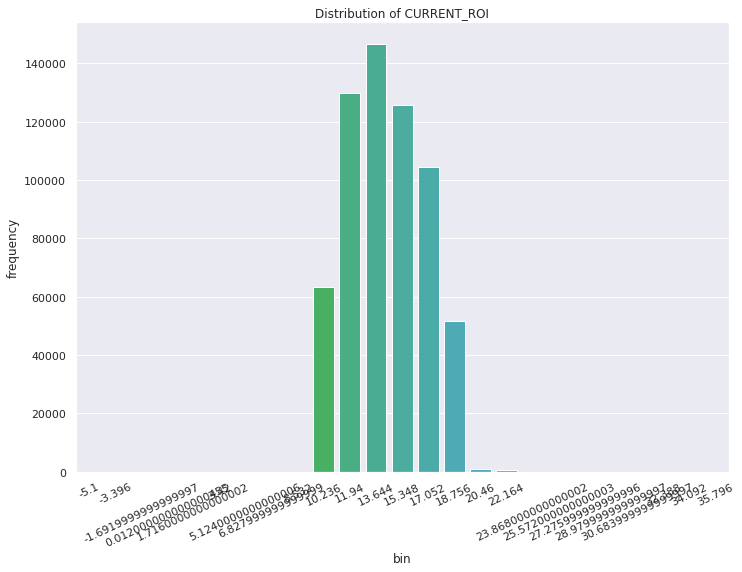

In [38]:
# Plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(hist_df['bin'],hist_df['frequency'])
plt.xticks(rotation=25)
plt.title('Distribution of CURRENT_ROI')
plt.show()
# plt.savefig('myimage.svg', format='svg', dpi=1200)

In [ ]:
spark.stop()